# PCA and Admixture for 1000 genomes (1000G) project
In this notebook, we will apply PCA and Admixture analyses to real human data from the 1000 genomes project that aims to explore genetic diversity of human populations across the globe.

![1000 genomes project](assets/1000G.png)

## PCA on 1000G data
We will be using low-coverage Phase 1 human from from the 1000G project. The data are not heavy, so easy to download and work with, and one can test a few popgen methods using these real data. First, you will need to make a directory, for example **population_structure**, for running the population structure analysis.

In [1]:
cd /home/nikolay/Documents/Teaching/PopGen_2023
mkdir population_structure
cd population_structure
pwd

/home/nikolay/Documents/Teaching/PopGen_2023/population_structure



Next, we will download the bam-alignments from the 1000G project and unzip them.

In [2]:
wget https://export.uppmax.uu.se/uppstore2018095/1000G.tar.gz
#wget https://export.uppmax.uu.se/naiss2023-22-1084/1000G.tar.gz
tar -xzf 1000G.tar.gz
rm 1000G.tar.gz

--2023-11-07 13:14:16--  https://export.uppmax.uu.se/uppstore2018095/1000G.tar.gz
Resolving export.uppmax.uu.se (export.uppmax.uu.se)... 89.44.248.44
Connecting to export.uppmax.uu.se (export.uppmax.uu.se)|89.44.248.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 294605223 (281M) [application/x-gzip]
Saving to: ‘1000G.tar.gz’

1000G.tar.gz        100%[===================>] 280,96M  35,1MB/s    in 8,2s    

2023-11-07 13:14:24 (34,4 MB/s) - ‘1000G.tar.gz’ saved [294605223/294605223]




For running the PCA and Admixture analyses with [ANGSD](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-014-0356-4), we will need to build a list of the available bam-files. It is also useful for us to check from this list what human populations are present in the Phase 1 of 1000G project.

In [3]:
cd 1000G_bam_files
find $PWD -name '*.bam' > ../1000G_bam_list.txt
cd ..
head 1000G_bam_list.txt

/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA18543.mapped.ILLUMINA.bwa.CHB.low_coverage.20130415.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA20334.mapped.ILLUMINA.bwa.ASW.low_coverage.20120522.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA18633.mapped.ILLUMINA.bwa.CHB.low_coverage.20130415.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA12348.mapped.ILLUMINA.bwa.CEU.low_coverage.20130415.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA12842.mapped.ILLUMINA.bwa.CEU.low_coverage.20130415.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA11832.mapped.ILLUMINA.bwa.CEU.low_coverage.20120522.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA12275.mapped.ILLUMINA.bwa.CEU.low_

In [5]:
wc -l 1000G_bam_list.txt

435 1000G_bam_list.txt



We can see that in total our dataset includes **435 bam-files** corresponding to **African (YRI)**, **European (CEU)** and **Asian (CHB)** populations, as well as two admixed populations: **African-American (ASW)** and **Mexican (MXL)**. ANGSD operates with genetic variation computed via genotype likelihoods. Therefore, we will have to perform genotype likelihoods variant calling prior to PCA and Admixture analyses. If you do not have ANGSD installed already, it can be downloaded and installed using instrictions from [http://www.popgen.dk/angsd/index.php/Installation](http://www.popgen.dk/angsd/index.php/Installation).

In [4]:
angsd -bam 1000G_bam_list.txt -GL 2 -doMajorMinor 1 -doMaf 1 -SNP_pval 2e-6 -minMapQ 30 -minQ 20 -minInd 25 -minMaf 0.05 -doGlf 2 -out 1000G -P 5

	-> angsd version: 0.940-dirty (htslib: 1.16) build(Aug 23 2023 11:40:54)
	-> angsd -bam 1000G_bam_list.txt -GL 2 -doMajorMinor 1 -doMaf 1 -SNP_pval 2e-6 -minMapQ 30 -minQ 20 -minInd 25 -minMaf 0.05 -doGlf 2 -out 1000G -P 5 
	-> Inputtype is BAM/CRAM
[multiReader] 435 samples in 435 input files
	-> SNP-filter using a pvalue: 2.000000e-06 correspond to 22.595043 likelihood units
	-> Parsing 435 number of samples 

	-> Allocated ~ 10 million nodes to the nodepool, this is not an estimate of the memory usage

	-> Allocated ~ 20 million nodes to the nodepool, this is not an estimate of the memory usage

	-> Allocated ~ 30 million nodes to the nodepool, this is not an estimate of the memory usage

	-> Allocated ~ 40 million nodes to the nodepool, this is not an estimate of the memory usage

	-> Allocated ~ 50 million nodes to the nodepool, this is not an estimate of the memory usage

	-> Allocated ~ 60 million nodes to the nodepool, this is not an estimate of the memory usage

	-> Allocated

The calculated genotype likelihoods for **106 variable sites** are contained within the **1000G.beagle.gz** file, which we are now going to use for performing PCA analysis. The second returned file, **1000G.mafs.gz**, contains information about allele frequencies of the identified genetic variants. You can read about advantages of doing PCA via genotype likelihoods for example [here](http://www.popgen.dk/software/index.php/PCAngsd). The PCANGSD method can be installed separately from ANGSD from [https://github.com/Rosemeis/pcangsd](https://github.com/Rosemeis/pcangsd).

In [5]:
pcangsd -b 1000G.beagle.gz -o pca_1000G -t 4

-------------------------------------
PCAngsd v1.2
Jonas Meisner and Anders Albrechtsen.
Using 4 thread(s).
-------------------------------------

Parsing Beagle file.
Loaded 1306 sites and 435 individuals.
Estimating minor allele frequencies.
EM (MAF) converged at iteration: 16
Number of sites after MAF filtering (0.05): 1306

Estimating covariance matrix.
Using 15 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2).	RMSE=0.066385679
Individual allele frequencies estimated (3).	RMSE=0.050454147
Individual allele frequencies estimated (4).	RMSE=0.006292501
Individual allele frequencies estimated (5).	RMSE=0.025063241
Individual allele frequencies estimated (6).	RMSE=0.003102337
Individual allele frequencies estimated (7).	RMSE=0.024891028
Individual allele frequencies estimated (8).	RMSE=0.002931002
Individual allele frequencies estimated (9).	RMSE=0.024905935
Individual allele frequencies estimated (10).	RMSE=0.0034

A peculiarity of computing PCA via ANGSD is that it does not directly generates a PCA plot but returns a variance-covariance matrix **pca_1000G.cov** which you will have to manually eigen-value-decompose and plot the eigen vectors in R. Note, that in order to color data points on the PCA plot, we will parse the list of bam-files from above in R, and extract the populations labels.

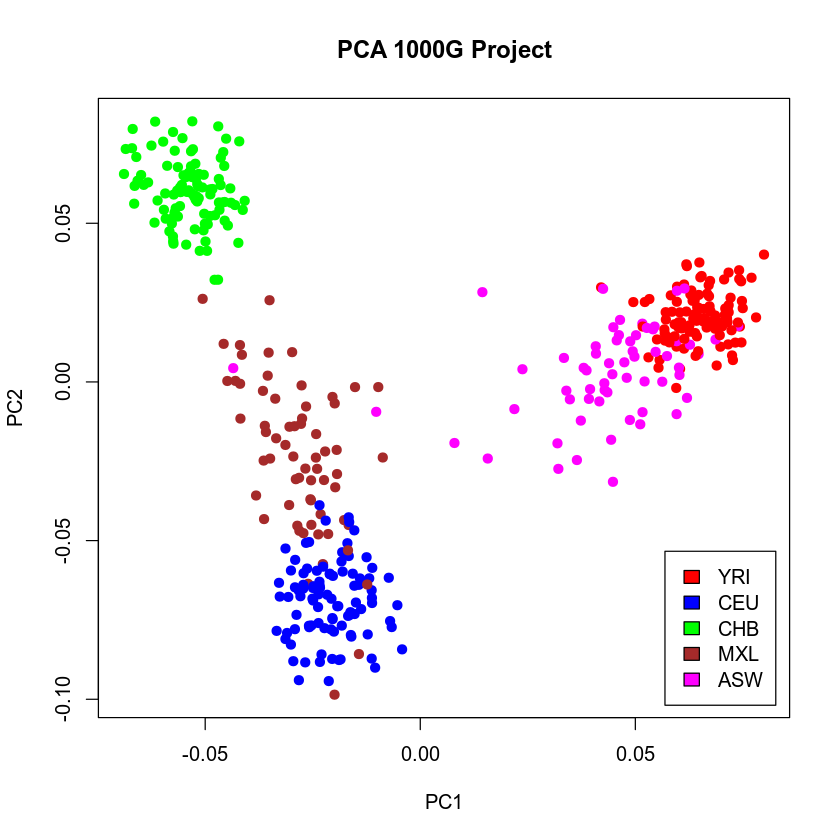

In [9]:
setwd("/home/nikolay/Documents/Teaching/PopGen_2023/population_structure")

C <- as.matrix(read.table("pca_1000G.cov"))
e <- eigen(C)
pops <- readLines("1000G_bam_list.txt")
pops <- sapply(strsplit(pops, "\\."), function(x) x[6])
mycolor <- rep("red", length(pops))
mycolor[pops == "CEU"] <- "blue"
mycolor[pops == "CHB"] <- "green"
mycolor[pops == "MXL"] <- "brown"
mycolor[pops == "ASW"] <- "magenta"
plot(e$vectors[, 1:2], xlab = "PC1", ylab = "PC2", main = "PCA 1000G Project", col = mycolor, pch = 19)
legend("bottomright", c("YRI", "CEU", "CHB", "MXL", "ASW"), fill = c("red", "blue", "green", "brown", "magenta"), cex = 1, inset = 0.02)

As expected, we have three clear clusters (main sources of variation) corresponding to **African (YRI)**, **European (CEU)** and **Asian (CHB)** populations, with the admixed populations falling in between. Let us see that this conclusion can be further confirmed from the Admixture analysis in the next section.

## Admixture on 1000G data
In this section, we will perform admixture analysis using the genetic variation data from 1000G project identified in the previous section, i.e. the file 1000G.beagle.gz. We will keep using the genotype likelihoods approach with ANGSD, and utilize **NGSadmix**, which is a tool within ANGSD. You do not need to install NGSadmix separetely as it is installed together with ANGSD, however, in case there are problems, the NGSadmix executable can be found within *pcangsd/misc* and launched from there. Please note that below we explicitly ask NGSadmix to detect K = 3 clusters.

In [12]:
NGSadmix -likes 1000G.beagle.gz -K 3 -minMaf 0.05 -seed 1 -o 1000G

Input: lname=1000G.beagle.gz nPop=3, fname=(null) qname=(null) outfiles=1000G
Setup: seed=1 nThreads=1 method=1
Convergence: maxIter=2000 tol=0.000010 tolLike50=0.100000 dymBound=0
Filters: misTol=0.050000 minMaf=0.050000 minLrt=0.000000 minInd=0
Input file has dim: nsites=1306 nind=435
Input file has dim (AFTER filtering): nsites=1306 nind=435
iter[start] like is=725129.713622
iter[50] like is=-454493.026878 thres=0.000841
iter[100] like is=-454474.788034 thres=0.000032
EM accelerated has reached convergence with tol 0.000010
best like=-454474.752968 after 115 iterations
	-> Dumpedfiles are: 1000G.log
	-> Dumpedfiles are: 1000G.qopt
	-> Dumpedfiles are: 1000G.fopt.gz
	[ALL done] cpu-time used =  4.84 sec
	[ALL done] walltime used =  5.00 sec



NGSadmix produces two files: **1000G.qopt** and **1000G.fopt.gz** containing admixture proportions and allele frequencies, respectively. If we look inside the 1000G.qopt files, we will see that for eahc of the 435 data points it contains fractions (i.e. contributions) of each of the 3 clusters that we required NGSadmix to identify.

In [6]:
head 1000G.qopt

0.00543120337380969750 0.03047764250291678037 0.96409115412327339723 
0.39746657097866411323 0.59699325992555196674 0.00554016909578402498 
0.00291473396727394071 0.00000000099999999999 0.99708526503272598696 
0.89272766803245084954 0.00000008404621942802 0.10727224792132973585 
0.87148184717709176184 0.12851815182290812767 0.00000000099999999997 
0.81529873054609225402 0.15780315987658605215 0.02689810957732174240 
0.83248589650022153386 0.07729402969534844570 0.09022007380443013147 
0.71004516603356415683 0.00000000099999999998 0.28995483296643576043 
0.09294217159488990521 0.90705782740511009532 0.00000000099999999997 
0.00000000099999999994 0.00000000099999999994 0.99999999799999994554 



Finally, we will plot the results using some helping functions from the ANGSD and NGSadmix developers.

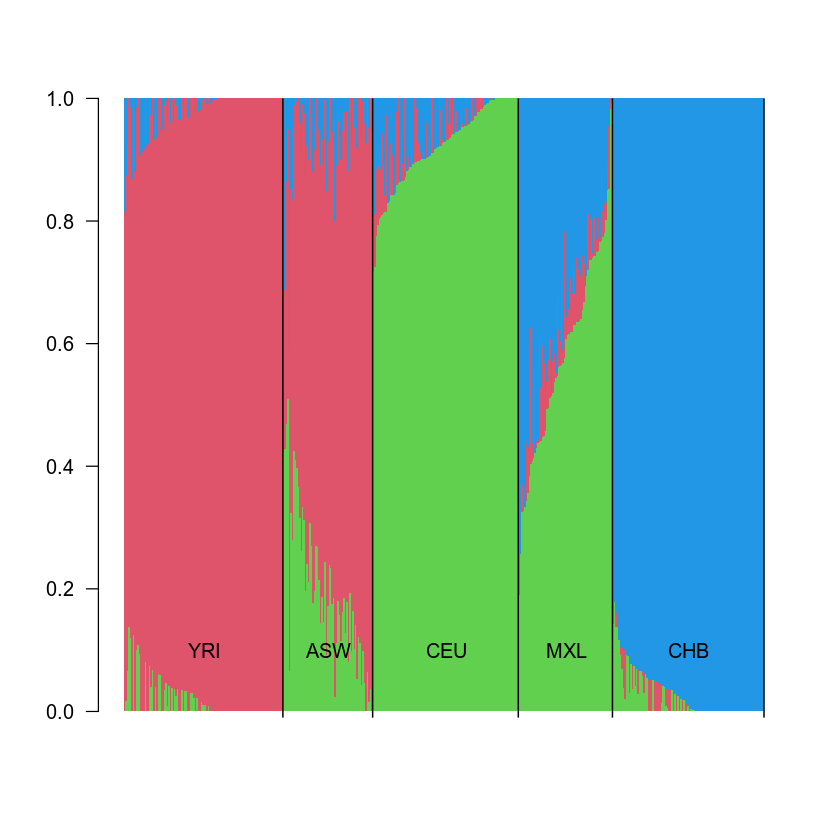

In [26]:
setwd("/home/nikolay/Documents/Teaching/PopGen_2023/population_structure")

pops <- readLines("1000G_bam_list.txt")
pops <- sapply(strsplit(pops, "\\."), function(x) x[6])
source("https://raw.githubusercontent.com/GenisGE/evalAdmix/master/visFuns.R")
qopts <- read.table("1000G.qopt")
ord <- orderInds(pop = pops, q = qopts, popord = c("YRI", "ASW", "CEU", "MXL", "CHB"))
barplot(t(qopts)[, ord], col = c(3, 2, 4), las = 2, space = 0, border = NA)
text(sort(tapply(1:length(pops), pops[ord], mean)), 0.1, unique(pops[ord]))
abline(v = cumsum(sapply(unique(pops[ord]), function(x) {sum(pops[ord] == x)})), col = 1, lwd = 1.2)

Again, we see three nearly unadmixed populations: YRI, CHB and CEU, and two admixed populations: MXL (mixture of CEU and CHB) and ASW (mixture of YRI and CEU). Therefore, one can infer for each individual, how much this individual is admixed and what are the populations contributing to the admixture.

## Fst analysis on 1000G data
In this section, we will perform Fst analysis via genotype likelihoods using the 1000G data, i.e. we will compare allele frequencies between European (CEU) and African (YRI) populations. The way ANGSD does it, it first computes Site Frequency Spectra (SFS) for CEU and YRI individually. So we will have to subset the list of bam-files to CEU and YRI individuals only and compute SFS. Below, we will start with CEU:

In [11]:
grep CEU 1000G_bam_list.txt > 1000G_CEU_bam_list.txt
wc -l 1000G_CEU_bam_list.txt
head 1000G_CEU_bam_list.txt

99 1000G_CEU_bam_list.txt
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA12348.mapped.ILLUMINA.bwa.CEU.low_coverage.20130415.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA12842.mapped.ILLUMINA.bwa.CEU.low_coverage.20130415.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA11832.mapped.ILLUMINA.bwa.CEU.low_coverage.20120522.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA12275.mapped.ILLUMINA.bwa.CEU.low_coverage.20120522.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA11830.mapped.ILLUMINA.bwa.CEU.low_coverage.20120522.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA12777.mapped.ILLUMINA.bwa.CEU.low_coverage.20130415.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA12287.ma

In [15]:
angsd -b 1000G_CEU_bam_list.txt -anc anc.fa -out CEU -dosaf 1 -gl 1

	-> angsd version: 0.940-dirty (htslib: 1.16) build(Aug 23 2023 11:40:54)
	-> angsd -b 1000G_CEU_bam_list.txt -anc anc.fa -out CEU -dosaf 1 -gl 1 
	-> Inputtype is BAM/CRAM
[multiReader] 99 samples in 99 input files
	-> Reading fasta: anc.fa
	-> Parsing 99 number of samples 
	-> Printing at chr: 13 pos:20676861 chunknumber 200 contains 833 sites
	-> Done reading data waiting for calculations to finish
	-> Done waiting for threads
	-> Output filenames:
		->"CEU.arg"
		->"CEU.saf.gz"
		->"CEU.saf.pos.gz"
		->"CEU.saf.idx"
	-> Tue Nov  7 14:21:40 2023
	-> Arguments and parameters for all analysis are located in .arg file
	-> Total number of sites analyzed: 163347
	-> Number of sites retained after filtering: 162624 
	[ALL done] cpu-time used =  41.99 sec
	[ALL done] walltime used =  42.00 sec



Now, we will subset YRI individuals and compute SFS for the African population.

In [12]:
grep YRI 1000G_bam_list.txt > 1000G_YRI_bam_list.txt
wc -l 1000G_YRI_bam_list.txt
head 1000G_YRI_bam_list.txt

108 1000G_YRI_bam_list.txt
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA19213.mapped.ILLUMINA.bwa.YRI.low_coverage.20120522.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA18504.mapped.ILLUMINA.bwa.YRI.low_coverage.20120522.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA19108.mapped.ILLUMINA.bwa.YRI.low_coverage.20130415.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA19238.mapped.ILLUMINA.bwa.YRI.low_coverage.20130415.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA19204.mapped.ILLUMINA.bwa.YRI.low_coverage.20120522.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA18516.mapped.ILLUMINA.bwa.YRI.low_coverage.20120522.bam
/home/nikolay/Documents/Teaching/PopGen_2023/population_structure/1000G_bam_files/small.NA18878.m

In [16]:
angsd -b 1000G_YRI_bam_list.txt -anc anc.fa -out YRI -dosaf 1 -gl 1

	-> angsd version: 0.940-dirty (htslib: 1.16) build(Aug 23 2023 11:40:54)
	-> angsd -b 1000G_YRI_bam_list.txt -anc anc.fa -out YRI -dosaf 1 -gl 1 
	-> Inputtype is BAM/CRAM
[multiReader] 108 samples in 108 input files
	-> Reading fasta: anc.fa
	-> Parsing 108 number of samples 
	-> Printing at chr: 16 pos:20080879 chunknumber 200 contains 601 sites
	-> Done reading data waiting for calculations to finish
	-> Done waiting for threads
	-> Output filenames:
		->"YRI.arg"
		->"YRI.saf.gz"
		->"YRI.saf.pos.gz"
		->"YRI.saf.idx"
	-> Tue Nov  7 14:22:50 2023
	-> Arguments and parameters for all analysis are located in .arg file
	-> Total number of sites analyzed: 159100
	-> Number of sites retained after filtering: 158453 
	[ALL done] cpu-time used =  44.02 sec
	[ALL done] walltime used =  44.00 sec



In [17]:
realSFS CEU.saf.idx YRI.saf.idx > CEU.YRI.ml

[persaf::persaf_init] Version of CEU.saf.idx is 3
[persaf::persaf_init] Assuming .saf.gz file is CEU.saf.gz
[persaf::persaf_init] Assuming .saf.pos.gz file is CEU.saf.pos.gz
[persaf::persaf_init] Version of YRI.saf.idx is 3
[persaf::persaf_init] Assuming .saf.gz file is YRI.saf.gz
[persaf::persaf_init] Assuming .saf.pos.gz file is YRI.saf.pos.gz
	-> args: tole:0.000000 nthreads:4 maxiter:100 nsites(block):0 start:(null) chr:(null) start:-1 stop:-1 fstout:(null) oldout:0 seed:-1 bootstrap:0 resample_chr:0 whichFst:0 fold:0 ref:(null) anc:(null)
[main] Multi SFS is 'still' under development. Please report strange behaviour.
	-> The choice of -nSites will require atleast: 45.203266 megabyte memory, that is at least: 0.28% of total memory
	-> dim(CEU.saf.idx):199
	-> dim(YRI.saf.idx):217
	-> Dimension of parameter space: 43183
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:1
	-> hello Im the master merge part of realSFS. 

In [22]:
realSFS fst index CEU.saf.idx YRI.saf.idx -sfs CEU.YRI.ml -fstout CEU_YRI

[persaf::persaf_init] Version of CEU.saf.idx is 3
[persaf::persaf_init] Assuming .saf.gz file is CEU.saf.gz
[persaf::persaf_init] Assuming .saf.pos.gz file is CEU.saf.pos.gz
[persaf::persaf_init] Version of YRI.saf.idx is 3
[persaf::persaf_init] Assuming .saf.gz file is YRI.saf.gz
[persaf::persaf_init] Assuming .saf.pos.gz file is YRI.saf.pos.gz
	-> args: tole:0.000000 nthreads:4 maxiter:100 nsites(block):0 start:CEU.YRI.ml chr:(null) start:-1 stop:-1 fstout:CEU_YRI oldout:0 seed:-1 bootstrap:0 resample_chr:0 whichFst:0 fold:0 ref:(null) anc:(null)
	-> nSites: 100000
	-> IMPORTANT: please make sure that your saf files haven't been folded with -fold 1 in -doSaf in angsd
	-> [reynoldFst] sfs1:198 sfs2:216 dimspace:43183 
	-> generating offset remapper lookup
	-> isSame:1 adjusting foldfactors
	-> Reading: CEU.YRI.ml assuming counts (will normalize to probs internally)
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'l

Now we will compute the average Fst for CEU vs, YRI populations.

In [23]:
realSFS fst stats CEU_YRI.fst.idx 

	-> Assuming idxname:CEU_YRI.fst.idx
	-> Assuming .fst.gz file: CEU_YRI.fst.gz
	-> FST.Unweight[nObs:158204]:0.008683 Fst.Weight:0.134346
0.008683	0.134346



The average Fst is not very informative as we do not know what loci the selection signal comes from. To figure tis out, we will have to compute Fst for CEU vs, YRI populations in a sliding window.

In [24]:
realSFS fst stats2 CEU_YRI.fst.idx -win 50 -step 10 > slidingwindow_win50_step10

	-> Assuming idxname:CEU_YRI.fst.idx
	-> Assuming .fst.gz file: CEU_YRI.fst.gz
	-> args: tole:0.000000 nthreads:4 maxiter:100 nsites(block):0 start:(null) chr:(null) start:-1 stop:-1 fstout:(null) oldout:0 seed:-1 bootstrap:0 resample_chr:0 whichFst:0 fold:0 ref:(null) anc:(null)
win:50 step:10
nSites:11218
nSites:10005
nSites:11825
nSites:7433
nSites:4580
nSites:4269
nSites:8855
nSites:1564
nSites:6271
nSites:1406
nSites:9853
nSites:11636
nSites:7716
nSites:3014
nSites:7606
nSites:6424
nSites:3210
nSites:9615
nSites:8824
nSites:16633
nSites:6247



And finally we will plot the results using custom R scripts:

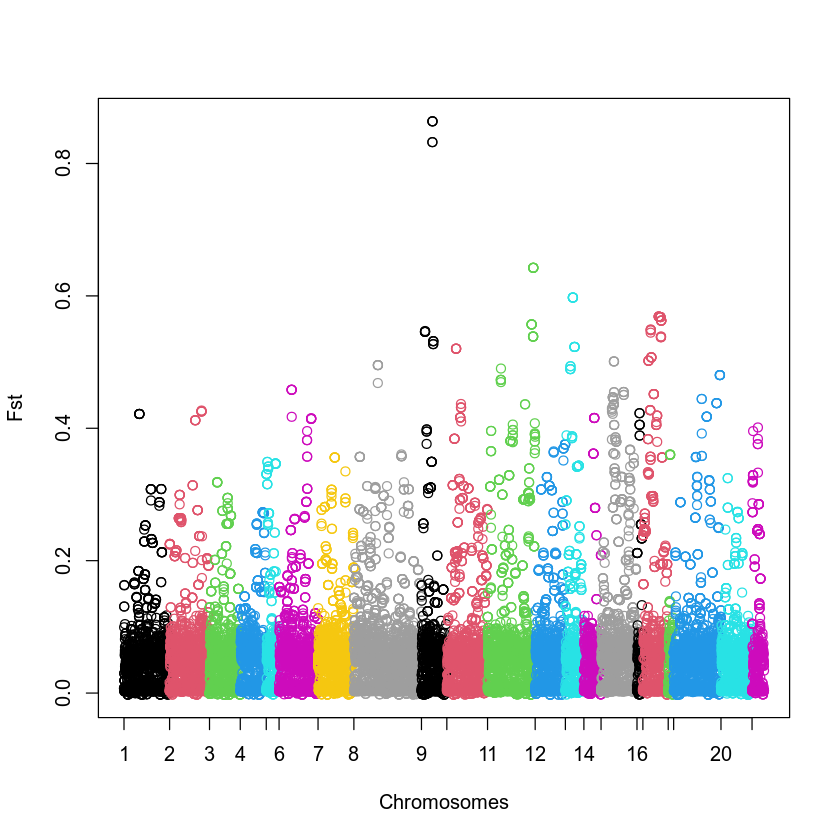

In [27]:
df <- read.delim("slidingwindow_win50_step10", header = FALSE)
df <- df[-1, ]
df$V2 <- as.numeric(df$V2)
df$V3 <- as.numeric(df$V3)
df$V5 <- as.numeric(df$V5)
df <- df[order(df$V2, df$V3), ]
rownames(df) <- seq(1, dim(df)[1], 1)
plot(df$V5, col = df$V2, xlab = "Chromosomes", ylab = "Fst", xaxt = "n")
myticks <- as.numeric(rownames(df[!duplicated(df$V2), ]))
axis(side = 1, at = myticks, labels = seq(1, 21, 1))